Ocupando esta data:
https://s3.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/cust_seg.csv
se busca segmentar por cliente con kmeans y luego generar gráficas por cada una de las clases

# Parte 1
Kmeans

## Importando librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
from sklearn.cluster import KMeans

## la data

In [3]:
archivo='/Users/matiasinostrozacifuentes/Desktop/python_intro/DataScience_Unilever/Semana_7/Data/cust_seg.csv'
data=pd.read_csv(archivo)

In [4]:
data

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...,...
845,845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,848,849,32,1,12,28,0.116,0.696,0.0,2.9


buscando NaN

In [5]:
data.isna().sum()

Unnamed: 0           0
Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

se ven NaN

In [8]:
data['Defaulted'].value_counts(dropna=False)

0.0    517
1.0    183
NaN    150
Name: Defaulted, dtype: int64

In [18]:
data.columns

Index(['Unnamed: 0', 'Customer Id', 'Age', 'Edu', 'Years Employed', 'Income',
       'Card Debt', 'Other Debt', 'Defaulted', 'DebtIncomeRatio'],
      dtype='object')

In [9]:
data1=np.nan_to_num(data)

In [24]:
data1=pd.DataFrame(data1)
data1.drop(0,axis=1,inplace=True)

In [25]:
data1.columns=['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income',
       'Card Debt', 'Other Debt', 'Defaulted', 'DebtIncomeRatio']

In [26]:
data1

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1.0,41.0,2.0,6.0,19.0,0.124,1.073,0.0,6.3
1,2.0,47.0,1.0,26.0,100.0,4.582,8.218,0.0,12.8
2,3.0,33.0,2.0,10.0,57.0,6.111,5.802,1.0,20.9
3,4.0,29.0,2.0,4.0,19.0,0.681,0.516,0.0,6.3
4,5.0,47.0,1.0,31.0,253.0,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...
845,846.0,27.0,1.0,5.0,26.0,0.548,1.220,0.0,6.8
846,847.0,28.0,2.0,7.0,34.0,0.359,2.021,0.0,7.0
847,848.0,25.0,4.0,0.0,18.0,2.802,3.210,1.0,33.4
848,849.0,32.0,1.0,12.0,28.0,0.116,0.696,0.0,2.9


## realizando el Kmeans

In [29]:
X=data1.drop(columns=['Years Employed','Card Debt','Other Debt']).values


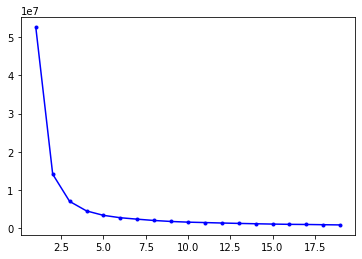

In [30]:
score = []
k_clusters = range(1,20)
for k in k_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    score.append(-kmeans.score(X))
    

plt.plot(k_clusters, score,'b.-')

In [31]:
k = 7
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

y_pred = kmeans.predict(X)

In [32]:
data1['Clase']=y_pred
data1

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clase
0,1.0,41.0,2.0,6.0,19.0,0.124,1.073,0.0,6.3,4
1,2.0,47.0,1.0,26.0,100.0,4.582,8.218,0.0,12.8,4
2,3.0,33.0,2.0,10.0,57.0,6.111,5.802,1.0,20.9,4
3,4.0,29.0,2.0,4.0,19.0,0.681,0.516,0.0,6.3,4
4,5.0,47.0,1.0,31.0,253.0,9.308,8.908,0.0,7.2,4
...,...,...,...,...,...,...,...,...,...,...
845,846.0,27.0,1.0,5.0,26.0,0.548,1.220,0.0,6.8,6
846,847.0,28.0,2.0,7.0,34.0,0.359,2.021,0.0,7.0,6
847,848.0,25.0,4.0,0.0,18.0,2.802,3.210,1.0,33.4,6
848,849.0,32.0,1.0,12.0,28.0,0.116,0.696,0.0,2.9,6


<AxesSubplot:xlabel='Clase', ylabel='Income'>

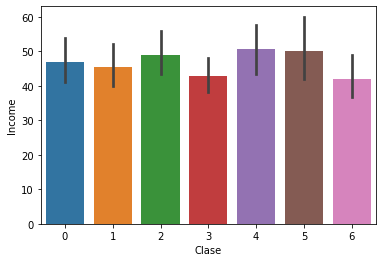

In [33]:
sns.barplot(data=data1,x='Clase',y='Income')

<AxesSubplot:xlabel='Edu', ylabel='Age'>

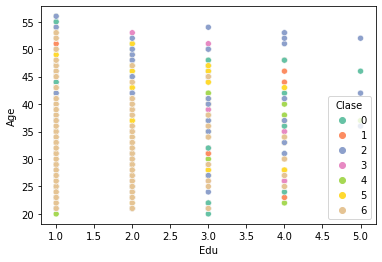

In [39]:
sns.scatterplot(data=data1,x='Edu',y='Age',hue='Clase',palette='Set2')

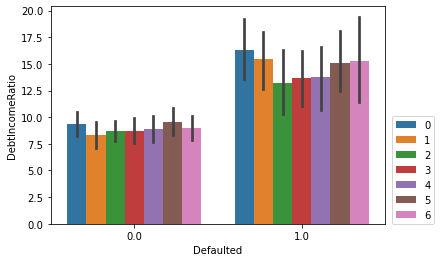

In [48]:
sns.barplot(data=data1,x='Defaulted',y='DebtIncomeRatio',hue='Clase')
plt.legend(loc=[1.02,0])

<AxesSubplot:xlabel='Age', ylabel='Count'>

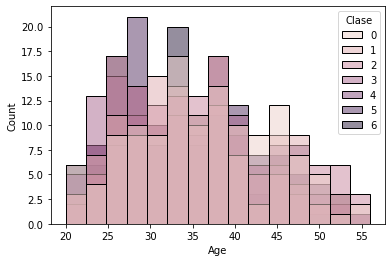

In [56]:
sns.histplot(data=data1,x='Age',hue='Clase')

Ya generado el Kmeans podemos ver que la segmentación lograda con el metodo del codo es de 7 clases, donde estas Clasifican claramente en diversos patrones

a menor grado educacional se puede ver que estan más cargados un estilo de clase, mientras que si vamos avanzando, las clases van cambiando